# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from collections import Counter
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Import Dataset

In [2]:
df = pd.read_csv("dataset_tugas.csv")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
df.drop(['class'], axis=1, inplace=True)

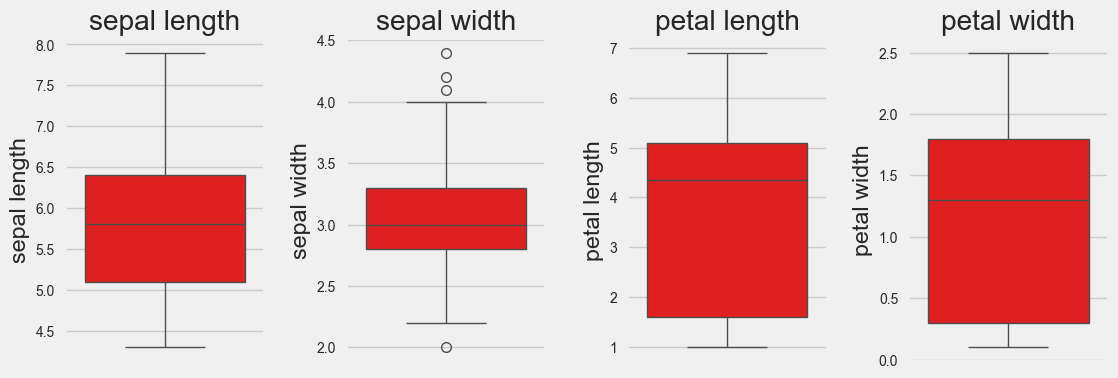

In [8]:
def box_plot(df):
    variabel = ['sepal length', 'sepal width', 'petal length', 'petal width']
    
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, var in enumerate(variabel):
        sns.boxplot(y=var, data=df, color='red', ax=axes[i])
        axes[i].set_title(var)
        
    plt.show()
    
box_plot(df)

In [9]:
def outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    outlier_counts = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75) 
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len(outliers)
        
    return outlier_counts


outlier_counts = outlier(df)
print(f"jumlah data outlier : {outlier_counts}")

jumlah data outlier : {'sepal length': 0, 'sepal width': 4, 'petal length': 0, 'petal width': 0}


Berdasarkan boxplot pada kolom **Sepal Width**, terlihat terdapat 4 outlier. Meskipun outlier dapat diatasi dengan menghapusnya, mengingat jumlah data yang kecil, penghapusan ini dapat menghilangkan informasi yang berharga. Selain itu, dari hasil analisis statistik deskriptif, jarak antara **Quartile 3 (Q3)** dan nilai maksimum tidak terlalu signifikan, sehingga penanganan outlier dianggap tidak diperlukan.

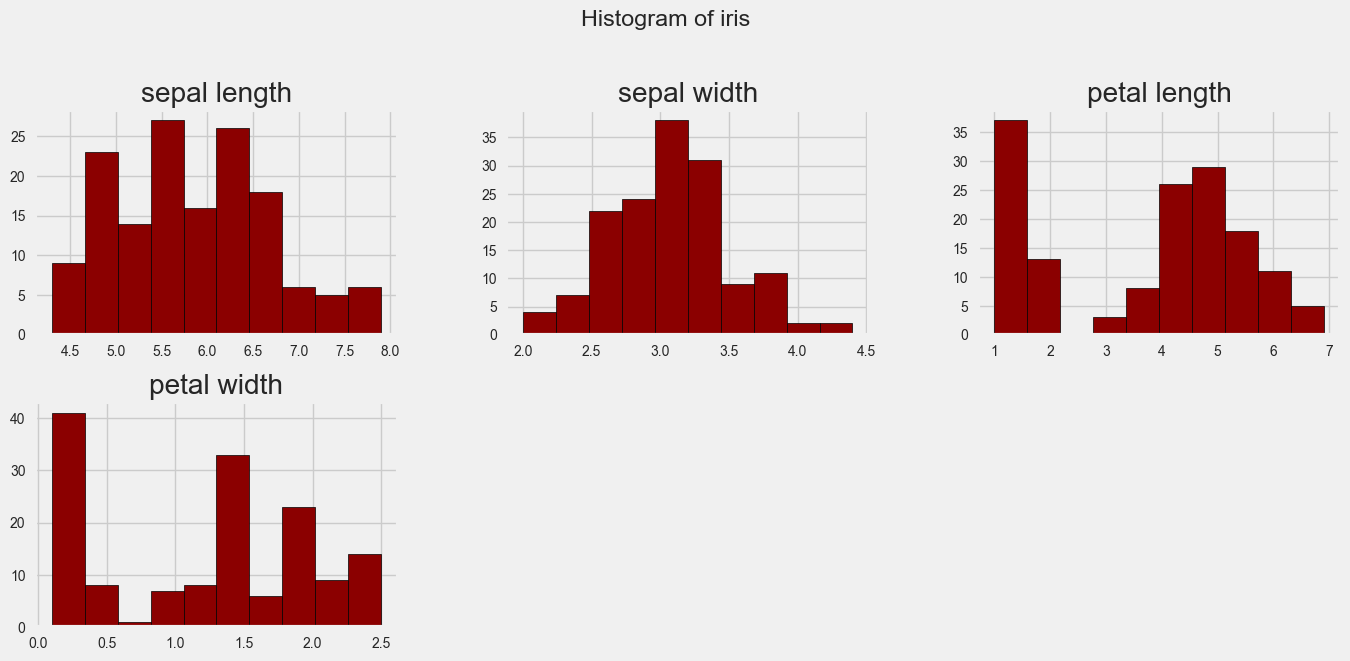

In [10]:
def plot_histograms(data):
    data.hist(bins=10, figsize=(15,10), layout=(3,3), color='darkred', edgecolor='black')
    plt.suptitle("Histogram of iris")
    plt.show()

plot_histograms(df)

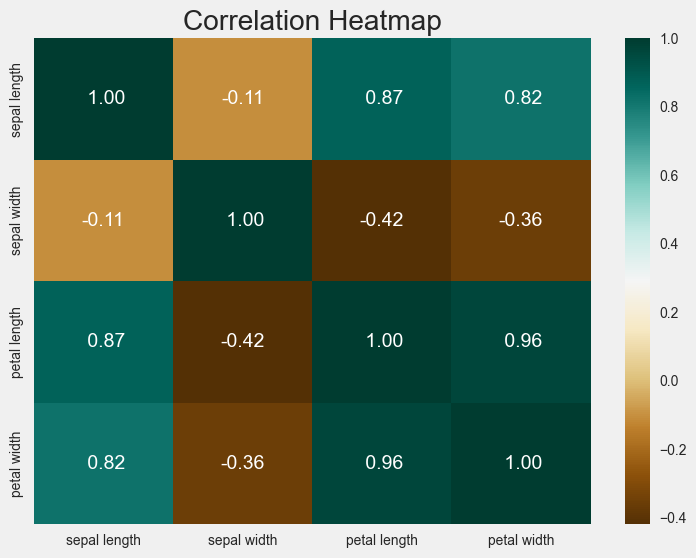

In [11]:
# Melihat nilai korelasi
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='BrBG', fmt=" .2f")
plt.title('Correlation Heatmap')
plt.show()

## Scaling Data

In [12]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Menggunakan MinMaxScaler untuk mengubah skala data menjadi range 0 - 1

# Modelling

## K-Means

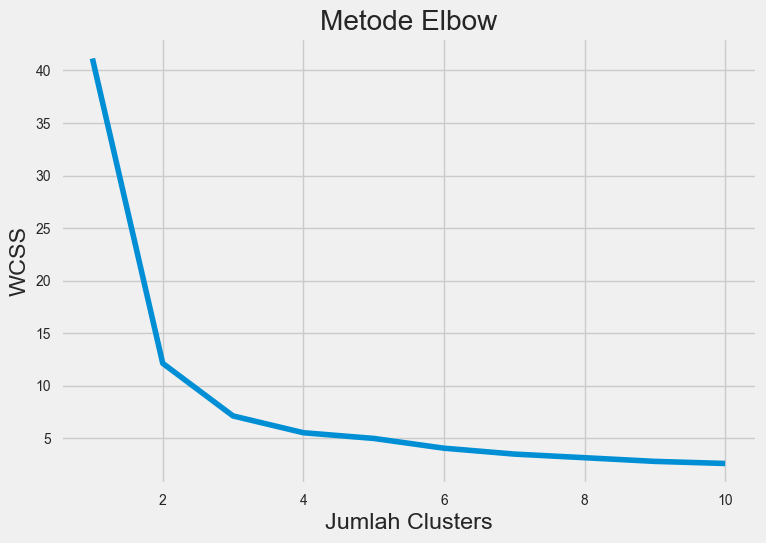

In [13]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah Clusters")
plt.ylabel("WCSS")
plt.show()

Pada grafik, terlihat adanya titik siku sekitar jumlah cluster = 3. Ini adalah lokasi di mana penurunan WCSS mulai melambat secara signifikan, menunjukkan bahwa penambahan cluster setelah titik ini memberikan manfaat yang semakin kecil.

In [14]:
model1 = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred1 = model1.fit_predict(X_scaled)

In [15]:
model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

In [16]:
df['Label_K-Means'] = model1.labels_
df

,sepal length,sepal width,petal length,petal width,Label_K-Means
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


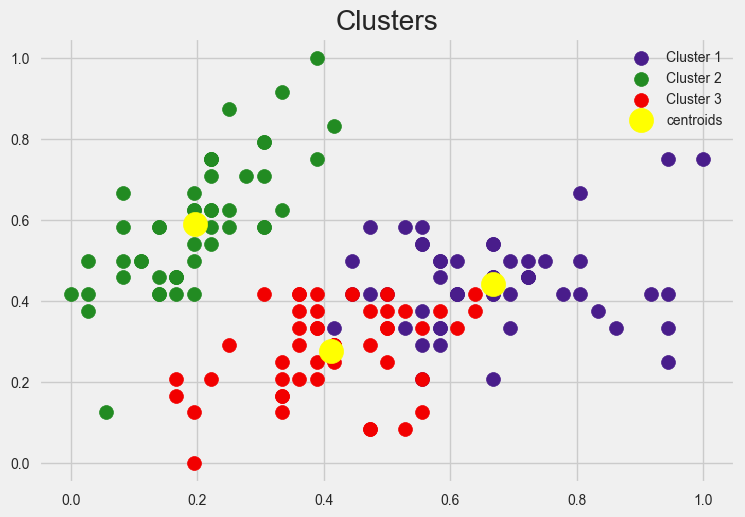

In [17]:
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
           s = 100, c = '#491D8B', label='Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
           s = 100, c = '#228b22', label='Cluster 2')

plt.scatter(X_scaled[y_pred1 == 2, 0], X_scaled[y_pred1 == 2, 1],
           s = 100, c = '#f20000', label='Cluster 3')


plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
           s = 300, c = 'yellow', label = 'centroids')

plt.title("Clusters")
plt.legend()
plt.show()

K-Means berhasil memisahkan data menjadi tiga cluster yang sesuai dengan pola distribusi fitur dalam dataset.

- Cluster 1 (Ungu): Didominasi oleh data dengan nilai tinggi pada sumbu horizontal (fitur X) dan nilai sedang hingga rendah pada sumbu vertikal (fitur Y).
- Cluster 2 (Hijau): Berisi data dengan nilai tinggi pada sumbu vertikal (fitur Y) dan nilai sedang hingga rendah pada sumbu horizontal (fitur X).
- Cluster 3 (Merah): Berada di area tengah grafik, dengan nilai fitur X dan Y yang lebih menyebar dibandingkan cluster lainnya.

Hasil ini menunjukkan bahwa K-Means berhasil memisahkan data menjadi tiga cluster yang berbeda berdasarkan pola distribusi dua fitur (fitur X dan fitur Y).

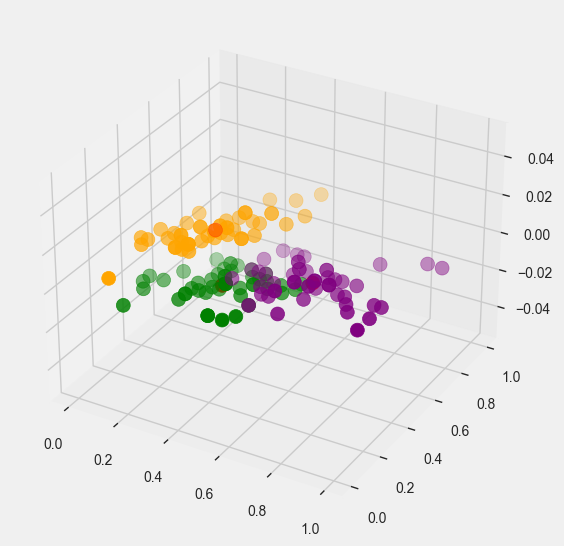

In [18]:
fig = plt.figure(figsize = (6,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_scaled[y_pred1 == 2, 0], X_scaled[y_pred1 == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

## DBSCAN

In [19]:
model2 = DBSCAN(eps=0.4, min_samples=5)

model2.fit(X_scaled)

y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [20]:
df['Label_DB-Scan'] = model2.labels_
df

,sepal length,sepal width,petal length,petal width,Label_K-Means,Label_DB-Scan
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


<Axes: xlabel='sepal length', ylabel='sepal width'>

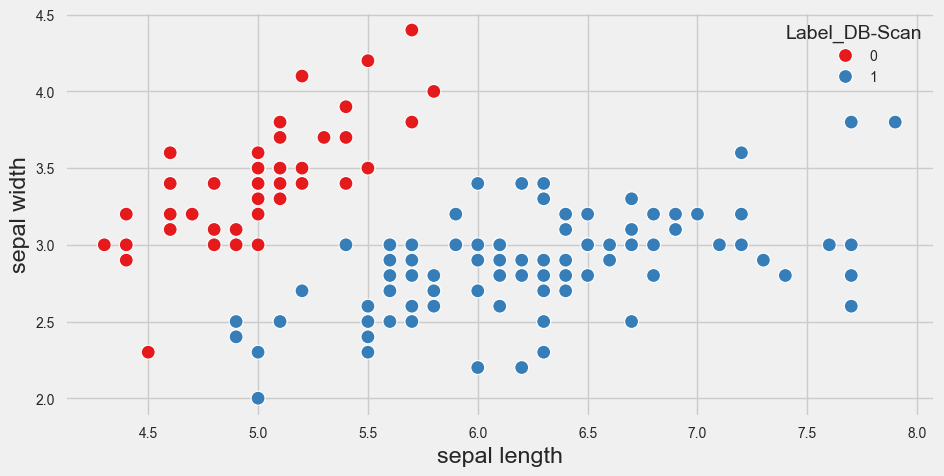

In [21]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x = 'sepal length', y = 'sepal width',
                hue = 'Label_DB-Scan', data = df, palette = "Set1", s=100)

# Metrics Evaluation

## Silhoutte Score

In [22]:
# Menghitung silhoutte score algoritma KMeans
evaluasi_kmeans = silhouette_score(X_scaled, y_pred1)
print("Silhoutte Score:", evaluasi_kmeans)

Silhoutte Score: 0.48247222154221125


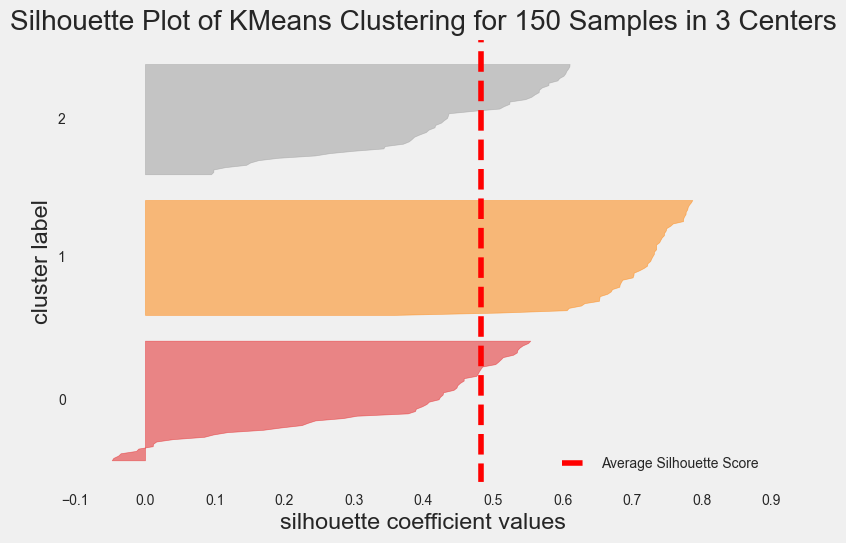

In [23]:
# Membuat silhoutte visualization untuk algoritma KMeans
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

Silhouette score adalah salah satu metode untuk mengevaluasi kualitas clustering. Nilai Silhouette Score berkisar antara -1 hingga 1, dengan interpretasi sebagai berikut:

- 1: Cluster sangat terpisah dan sangat baik.
- 0: Data berada di antara dua cluster dan tidak jelas ke cluster mana seharusnya ditempatkan.
- -1: Data lebih cocok berada di cluster lain (terjadi kesalahan dalam clustering).

Nilai: 0.482 menunjukkan bahwa hasil clustering menggunakan K-Means menunjukkan bahwa meskipun data dikelompokkan dengan cukup baik, masih ada area tumpang tindih atau pengelompokan yang tidak optimal.

In [24]:
# Menghitung silhoutte score algoritma DBSCAN
evaluasi_dbscan = silhouette_score(X_scaled, y_pred2)
print("Silhoutte Score:", evaluasi_dbscan)

Silhoutte Score: 0.6294675561906644


DBSCAN dengan Silhouette Score 0.629 menunjukkan hasil yang lebih baik dalam memisahkan cluster, terutama jika data memiliki bentuk atau distribusi yang tidak sesuai dengan asumsi K-Means.

## Davies-Bouldin Index (DBI)

In [25]:
# Menghitung DBI score algoritma KMeans
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.7874978912757878


In [26]:
# Menghitung DBI score algoritma DBSCAN
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 0.48770481288357487


Davies-Bouldin Index (DBI) adalah salah satu metrik untuk mengevaluasi kualitas clustering. Nilai DBI digunakan untuk mengukur sejauh mana cluster yang dihasilkan terpisah dan homogen. Secara lebih rinci:

- Nilai DBI rendah menunjukkan bahwa cluster lebih terpisah (baik) dan lebih homogen (baik), sehingga clustering yang dihasilkan lebih baik.
- Nilai DBI tinggi menunjukkan bahwa cluster cenderung tumpang tindih atau kurang homogen, yang berarti kualitas clustering kurang baik.

K-Means menghasilkan clustering dengan DBI yang lebih tinggi (0.787), yang menunjukkan bahwa meskipun cluster terpisah dengan cukup baik, ada kemungkinan bahwa beberapa cluster saling tumpang tindih dan tidak homogen.

DBSCAN menghasilkan clustering dengan DBI yang lebih rendah (0.487), menunjukkan bahwa DBSCAN lebih efektif dalam memisahkan data ke dalam cluster yang lebih jelas terpisah dan lebih homogen dibandingkan dengan K-Means.